Please enter the filepath to the file below or dowload through the kaggle api 

# Project 2 : Finding wines and sommeliers in the winemagazine data

This dataset is from WineEnthusiast which includes 130k wine reviews with variety, location, winery, price and description. It is updated on November 22nd, 2017 which is exactly 7 years from now.  This dataset is including columns for country, description, designation, points, price, province, regions, title, variety, winery.

In [4]:
import os as os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
file_path = "/Users/gimle/Data 201/Data 201 project 2/winemag-data-130k-v2.csv"

The code below is for troubleshooting the Kaggle API download 

In [9]:
import subprocess

try:
    import kaggle
    print("Kaggle is installed.")
except ImportError:
    print("Kaggle is not installed. Installing now...")
    subprocess.check_call(["pip", "install", "kaggle"])

Kaggle is installed.


In [11]:
from kaggle.api.kaggle_api_extended import KaggleApi

if os.path.exists(file_path):
    print("file correctly installed", file_path)
    
# if kaggle.json exists 
elif os.path.exists(os.path.expanduser("~/.kaggle/kaggle.json")):
    print("File does not exist, but now downloading from kaggle")
    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files('zynicide/wine-reviews', path='.', unzip=True)
    if os.path.exists(file_path):
        print("File is here:", file_path)
    else:
        print("File in the wrong place pls check.")
else: 
    print("please download the file / get kaggle API: https://www.kaggle.com/docs/api") 

file correctly installed /Users/gimle/Data 201/Data 201 project 2/winemag-data-130k-v2.csv


In [13]:
if os.path.exists(file_path): 
    sommelier = pd.read_csv(file_path)
    print("somelier created")
   
else: 
    print("youve got fix the filepath") 

somelier created


# EDA 

In order to use this dataset we first have to take some basic data cleaning steps, including but not limited to removing columns such as description, and provice. The description column contains an excerpt and sometimes the entire wine review, and since we are not performing any natural language processing we have chosen to leave it out. province and specific region columns were removed because they had too many unique values and were therefore ill suited for data transformation. 


In [16]:
 sommelier.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [18]:
sommelier.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [20]:
# Removing unnecessary columns
sommelier.drop(['Unnamed: 0', 'region_2',
       'taster_twitter_handle'], axis=1, inplace=True) 

We have chosen to add an extra column that includes the vintage as most bottles appear to contain the vintage in their title. 

In [23]:
# find vintage, year pattern is \b\d{4}\b
sommelier['vintage'] = sommelier['title'].str.extract(r'(\b\d{4}\b)')

In [25]:
vintage_count = sommelier['vintage'].value_counts()
print(vintage_count) 

vintage
2013    15856
2012    15723
2014    15570
2011    12531
2010    12149
        ...  
1503        1
1935        1
1969        1
1967        1
1945        1
Name: count, Length: 90, dtype: int64


In [27]:
sommelier.isna().sum() 

country           63
description        0
designation    37465
points             0
price           8996
province          63
region_1       21247
taster_name    26244
title              0
variety            1
winery             0
vintage         4609
dtype: int64

In [29]:
# there are a handful of wines that lack country, 
# province and one that lacks variety, there is limited value in keeping these so we will remove them
sommelier.dropna(subset=['variety','province','country','vintage'], inplace = True)
# checking to see if we were successful
sommelier.isna().sum()

country            0
description        0
designation    37148
points             0
price           8522
province           0
region_1       20633
taster_name    25161
title              0
variety            0
winery             0
vintage            0
dtype: int64

In [31]:
# Checking types
print(sommelier.dtypes)

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
taster_name     object
title           object
variety         object
winery          object
vintage         object
dtype: object


In [33]:
# Making year an integer
sommelier['vintage'] = sommelier['vintage'].astype(int)

In [35]:
# Making removing obvious mistakes
# Wines have been discovered from as early as the 15th century I believe, but they are only curiosities and have little to no acutal flavour value, they are therefore not included in our search
sommelier = sommelier[(sommelier['vintage'] >= 1600) & (sommelier['vintage'] <= 2024)]

# To do list EDA:  
1. Remove Twitter handles -> done
2. Remove unnamed column -> done
3. Remove Region 2 (unnecessary)  -> done
4. Check that every wine has the following -> done
   points 
   price
   variety
   country
   province
5. Structure the dataframe correctly -> done
6. create new column based on vintage -> done
7. Print examples from description column -> NOT DONE YET
8. Eliminate vintage value counts that are unreasonable (under 1000 and over 2024)
9. Check frequency of countries and regions

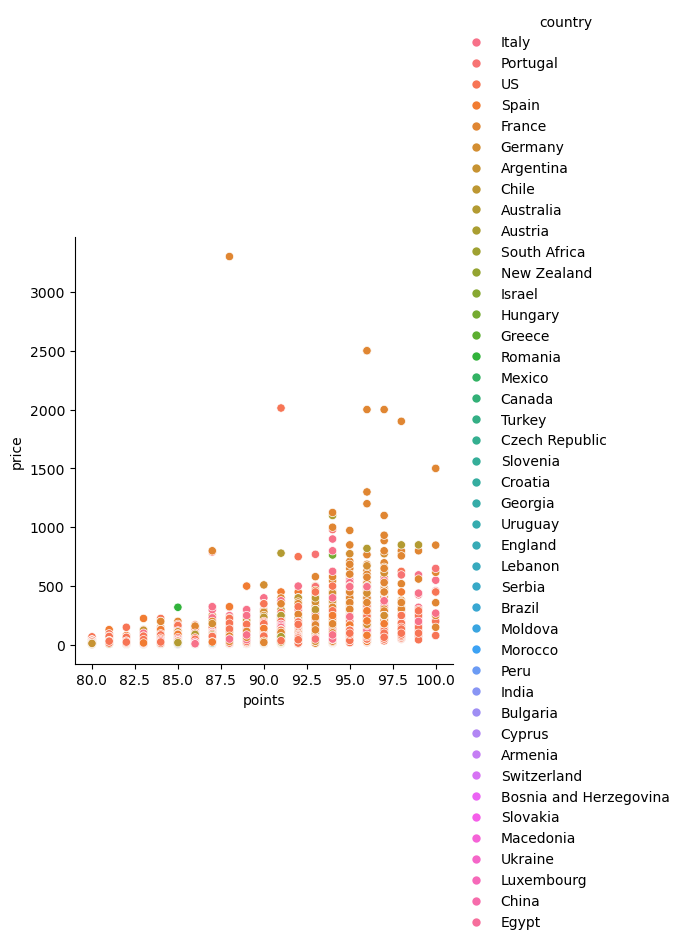

In [38]:
sns.relplot(x = 'points',
            y = "price", 
            data = sommelier,
            kind= "scatter", 
            hue = 'country',
            )
#plt.title
#plt.xlabel
#plt.ylabel
#plt.show()

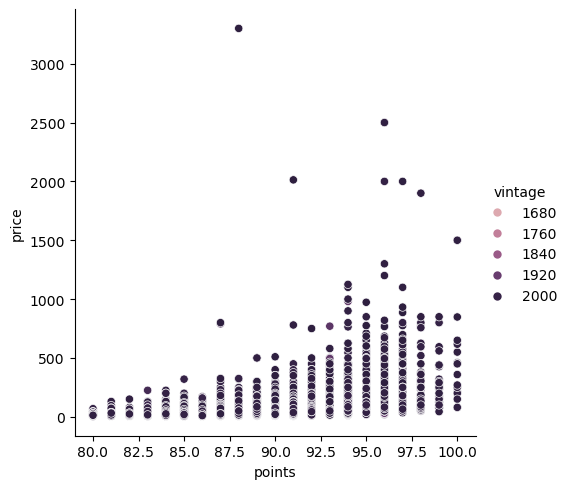

In [39]:
# It is interesting that the wine reviewers clearly do not review wine that is below "80%", In reality they operate on a 1 to 20 scale, and then add 80 points 
sns.relplot(x = 'points',
            y = "price", 
            data = sommelier,
            kind= "scatter", 
            hue = 'vintage',
            )
#plt.title
#plt.xlabel
#plt.ylabel
# plt.show()

In [40]:
print( sommelier['taster_name'].unique())


['Kerin O’Keefe' 'Roger Voss' 'Paul Gregutt' 'Alexander Peartree'
 'Michael Schachner' 'Anna Lee C. Iijima' 'Virginie Boone' 'Matt Kettmann'
 nan 'Sean P. Sullivan' 'Jim Gordon' 'Joe Czerwinski'
 'Anne Krebiehl\xa0MW' 'Lauren Buzzeo' 'Mike DeSimone' 'Jeff Jenssen'
 'Susan Kostrzewa' 'Carrie Dykes' 'Fiona Adams' 'Christina Pickard']


In [41]:
print( (sommelier['taster_name'] == 'Kerin O’Keefe').sum())


10454


In [42]:
# this code colours all the points related to a specific sommelier in blue 
colors = sommelier['taster_name'].apply(lambda x: 'blue' 
                                        if x == 'Kerin O’Keefe'
                                        else 'gray')

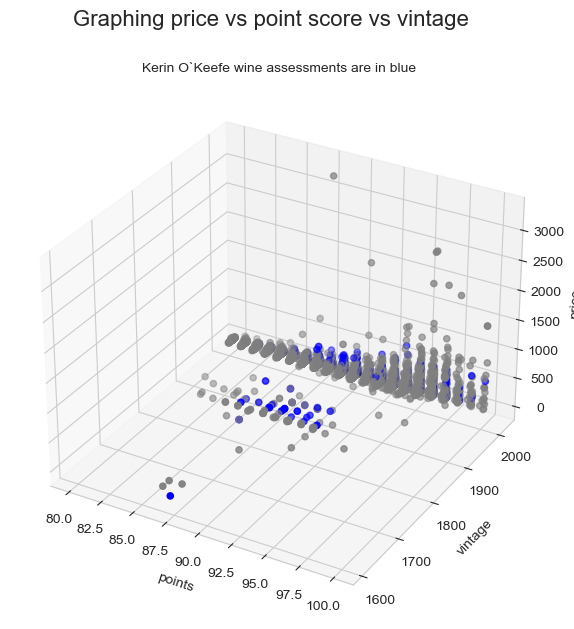

In [43]:
# 3D plot of the taster named in the above chunk and how they map onto price, score and vintage age 
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(7,7))

# ax = Axes3D(fig) Did not work

ax = fig.add_subplot(111, projection='3d')

c = 'price'
a = 'points'
b = 'vintage'

x = sommelier[a]
y = sommelier[b]
z = sommelier[c]


ax.scatter(x, y, z, c=colors, marker='o')


ax.set_xlabel(a)
ax.set_ylabel(b)
ax.set_zlabel(c)
plt.suptitle('Graphing price vs point score vs vintage', fontsize=16)
plt.title('Kerin O`Keefe wine assessments are in blue',fontsize=10) 
plt.show()


There is clustering here, and trying various tasters resulted in different clusters. For example 'Kerin O’Keefe' appears to rate wines from the early 20th century between 85 and 90 points but rarely higher. His more recent post 2000 wines have a much greater spread. 

# Machine Learning component

For the machine learning component 

In [46]:
print(sommelier['winery'].unique())
print(sommelier['province'].unique())
print(sommelier['variety'].unique())
print(sommelier['country'].unique())

['Nicosia' 'Quinta dos Avidagos' 'Rainstorm' ... 'Mas de Pampelonne'
 'Bodegas Eidosela' 'Penedo Borges']
['Sicily & Sardinia' 'Douro' 'Oregon' 'Michigan' 'Northern Spain' 'Alsace'
 'Rheinhessen' 'California' 'Mosel' 'Other' 'Mendoza Province' 'Virginia'
 'Beaujolais' 'Colchagua Valley' 'Southern Italy' 'Maule Valley'
 'Bordeaux' 'Maipo Valley' 'Washington' 'Central Italy' 'Burgundy'
 'South Australia' 'Tejo' 'Rapel Valley' 'Galicia' 'France Other'
 'Tuscany' 'Burgenland' 'New York' 'Leyda Valley' 'Piedmont'
 'Stellenbosch' 'Simonsberg-Stellenbosch' 'Walker Bay' 'Alentejano'
 'Central Spain' 'Southwest France' 'Aconcagua Valley' 'Loncomilla Valley'
 'Marlborough' 'Northeastern Italy' 'Casablanca Valley' 'Veneto'
 'Western Cape' 'Judean Hills' 'Alentejo' 'Coastal Region' 'Rhône Valley'
 'Galilee' 'Beira Atlantico' 'Tokaj' 'Leithaberg' 'Santorini' 'Kremstal'
 'Catalonia' 'Recas' "Hawke's Bay" 'Curicó Valley' 'Limarí Valley'
 'Colchagua Costa' 'Languedoc-Roussillon' 'Provence' 'Rheingau' 

In [47]:
sommelier.nunique()

country            43
description    115604
designation     36072
points             21
price             389
province          419
region_1         1217
taster_name        19
title          115161
variety           692
winery          16328
vintage            83
dtype: int64

In [48]:
print(sommelier['taster_name'].unique())

['Kerin O’Keefe' 'Roger Voss' 'Paul Gregutt' 'Alexander Peartree'
 'Michael Schachner' 'Anna Lee C. Iijima' 'Virginie Boone' 'Matt Kettmann'
 nan 'Sean P. Sullivan' 'Jim Gordon' 'Joe Czerwinski'
 'Anne Krebiehl\xa0MW' 'Lauren Buzzeo' 'Mike DeSimone' 'Jeff Jenssen'
 'Susan Kostrzewa' 'Carrie Dykes' 'Fiona Adams' 'Christina Pickard']


In [49]:
# Getting dummies and getting rid of unwanted features 

# So this will be a controversial choice, less so than age, specific years are often associated with good harvest and therefore makes vintage year a categorical variable rather than a clearly numeric one
sommelier['wine_age'] = 2024 - sommelier['vintage']
sommelier_ml = sommelier.copy() 
# We think that province, winery, and variety (especially variety) would probably be a good feature, but unfortunately it might make the whole thing a little too complex.
sommelier_ml.drop(['designation', 'description', 'title','region_1','province','winery','vintage','variety'], axis=1, inplace=True)

sommelier_ml = pd.get_dummies(sommelier_ml, columns=['country'], drop_first=True)

print(sommelier_ml.head(3))


   points  price    taster_name  wine_age  country_Armenia  country_Australia  \
0      87    NaN  Kerin O’Keefe        11            False              False   
1      87   15.0     Roger Voss        13            False              False   
2      87   14.0   Paul Gregutt        11            False              False   

   country_Austria  country_Bosnia and Herzegovina  country_Brazil  \
0            False                           False           False   
1            False                           False           False   
2            False                           False           False   

   country_Bulgaria  ...  country_Serbia  country_Slovakia  country_Slovenia  \
0             False  ...           False             False             False   
1             False  ...           False             False             False   
2             False  ...           False             False             False   

   country_South Africa  country_Spain  country_Switzerland  country_Turk

In [50]:
sommelier_ml.isna().sum() 

points                                0
price                              8521
taster_name                       25156
wine_age                              0
country_Armenia                       0
country_Australia                     0
country_Austria                       0
country_Bosnia and Herzegovina        0
country_Brazil                        0
country_Bulgaria                      0
country_Canada                        0
country_Chile                         0
country_China                         0
country_Croatia                       0
country_Cyprus                        0
country_Czech Republic                0
country_Egypt                         0
country_England                       0
country_France                        0
country_Georgia                       0
country_Germany                       0
country_Greece                        0
country_Hungary                       0
country_India                         0
country_Israel                        0


In [51]:
sommelier_ml['price'].fillna(sommelier_ml['price'].median(), inplace=True)
sommelier_ml.dropna(subset=['taster_name'], inplace=True)


/var/folders/vt/8zqwv5_51777lk_0p42g3sdr0000gn/T/ipykernel_10532/3283839004.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sommelier_ml['price'].fillna(sommelier_ml['price'].median(), inplace=True)


In [53]:
# For running a simpler test in part two 
sommelier_ml_2 = sommelier_ml.copy()
sommelier_ml_2['older'] = (sommelier_ml['wine_age'] > 20).astype(int)


In [54]:
sommelier_ml_2 = pd.get_dummies(sommelier_ml_2, columns=['taster_name'], drop_first=True)

# Creating a model in order to find what makes a wine likely to be review by kerin O'Keefe
Does Kerin O'Keefe have a type? 

In [56]:
sommelier_ml['reviewed_by_kerin'] = (sommelier_ml['taster_name'] == 'Kerin O’Keefe').astype(int)

In [57]:
sommelier_ml.drop('taster_name', axis=1, inplace=True)

In [58]:
sommelier_ml.isna().sum() 

points                            0
price                             0
wine_age                          0
country_Armenia                   0
country_Australia                 0
country_Austria                   0
country_Bosnia and Herzegovina    0
country_Brazil                    0
country_Bulgaria                  0
country_Canada                    0
country_Chile                     0
country_China                     0
country_Croatia                   0
country_Cyprus                    0
country_Czech Republic            0
country_Egypt                     0
country_England                   0
country_France                    0
country_Georgia                   0
country_Germany                   0
country_Greece                    0
country_Hungary                   0
country_India                     0
country_Israel                    0
country_Italy                     0
country_Lebanon                   0
country_Luxembourg                0
country_Macedonia           

In [59]:
from sklearn.model_selection import train_test_split

X = sommelier_ml.drop(['reviewed_by_kerin'], axis=1)
y = sommelier_ml['reviewed_by_kerin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('done')

done


In [60]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=10, 
            n_estimators=200,
            random_state=2)
print('complete')

complete


In [61]:
# Fit gb to the training set
gb.fit(X_train,y_train)

# Predict test set labels
y_pred = gb.predict(X_test)
print('complete')

complete


In [62]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('complete')
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

complete
Test set RMSE of gb: 0.014


# Decison Tree Regressor 
Attempt at making a decison tree regressor 

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

# Set SEED for reproducibility
SEED = 123

X = sommelier_ml.drop(['reviewed_by_kerin'], axis=1)
y = sommelier_ml['reviewed_by_kerin']


# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=SEED)


print('done')

done


In [65]:
# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=10, 
                           min_samples_leaf=0.14, 
                           random_state=SEED)

MSE_CV = - cross_val_score(dt, 
                          X_train, 
                          y_train, 
                          cv = 10, 
                          scoring = 'neg_mean_squared_error', 
                          n_jobs = -1)
dt.fit(X_train, y_train)
y_predict_train = dt.predict(X_train)
y_predict_test = dt.predict(X_test)
print('done')

done


In [66]:
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))

CV MSE: 0.07


In [71]:
print('Train MSE: {:.2f}'.format(MSE(y_train, y_predict_train)))

Train MSE: 0.07


In [72]:
print('Test MSE: {:.2f}'.format(MSE(y_test, y_predict_test)))

Test MSE: 0.08


In [73]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict_test)
print(f"R^2: {r2:.2f}")

R^2: 0.21


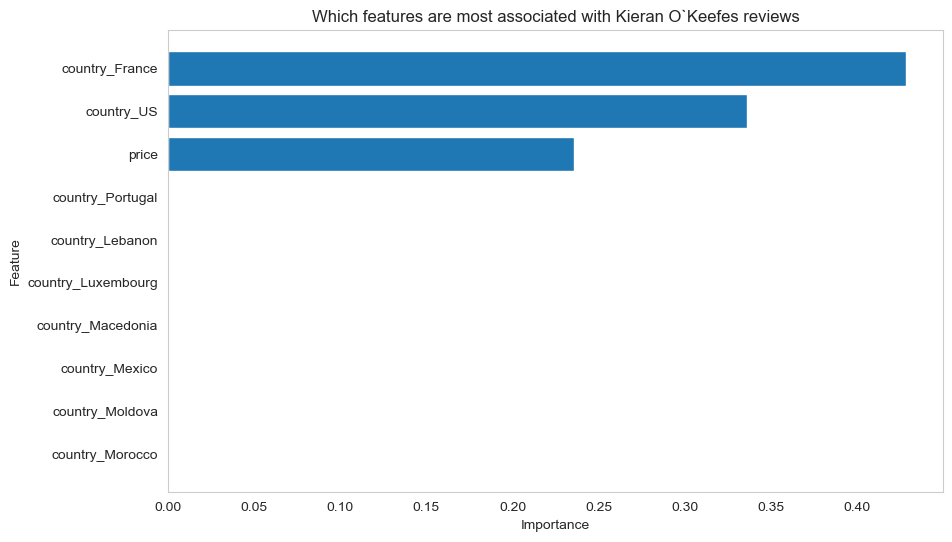

In [74]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)


top_10 = feature_importance.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10['Feature'], top_10['Importance'])
plt.gca().invert_yaxis() 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Which features are most associated with Kieran O`Keefes reviews')
plt.show()

# Creating a model trying to determine what characterizes an older wine

In [90]:
sommelier_ml_2 = sommelier_ml_2.drop(['wine_age'], axis =1)

In [91]:
from sklearn.model_selection import train_test_split


X = sommelier_ml_2.drop(['older'], axis=1)
y = sommelier_ml_2['older']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('done') 

done


In [92]:
print(type(sommelier_ml_2))

<class 'pandas.core.frame.DataFrame'>


In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('done')

done


In [94]:
accuracy = accuracy_score(y_test, y_pred)
print('accuracy: {accuracy}')

accuracy: {accuracy}


In [95]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                       Feature    Importance
1                        price  3.671996e-01
0                       points  1.536572e-01
23               country_Italy  1.425874e-01
41                  country_US  7.735138e-02
51  taster_name_Joe Czerwinski  4.847408e-02
..                         ...           ...
35            country_Slovakia  1.772419e-07
34              country_Serbia  1.630803e-07
2              country_Armenia  8.680786e-08
25          country_Luxembourg  2.967853e-08
10               country_China  0.000000e+00

[62 rows x 2 columns]


In [96]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Probability score
y_pred_prob = model.predict_proba(X_test)[:, 1]

# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))



Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     29354
           1       0.74      0.29      0.42       682

    accuracy                           0.98     30036
   macro avg       0.86      0.64      0.70     30036
weighted avg       0.98      0.98      0.98     30036

Confusion Matrix:
 [[29283    71]
 [  484   198]]
ROC-AUC Score: 0.7833391393600256


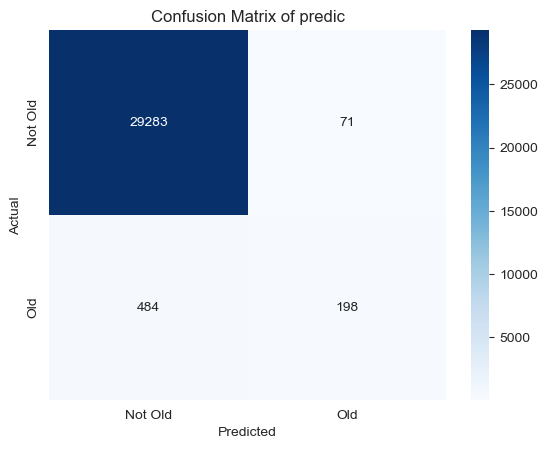

In [97]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Old', 'Old'], yticklabels=['Not Old', 'Old'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of predic')
plt.show()

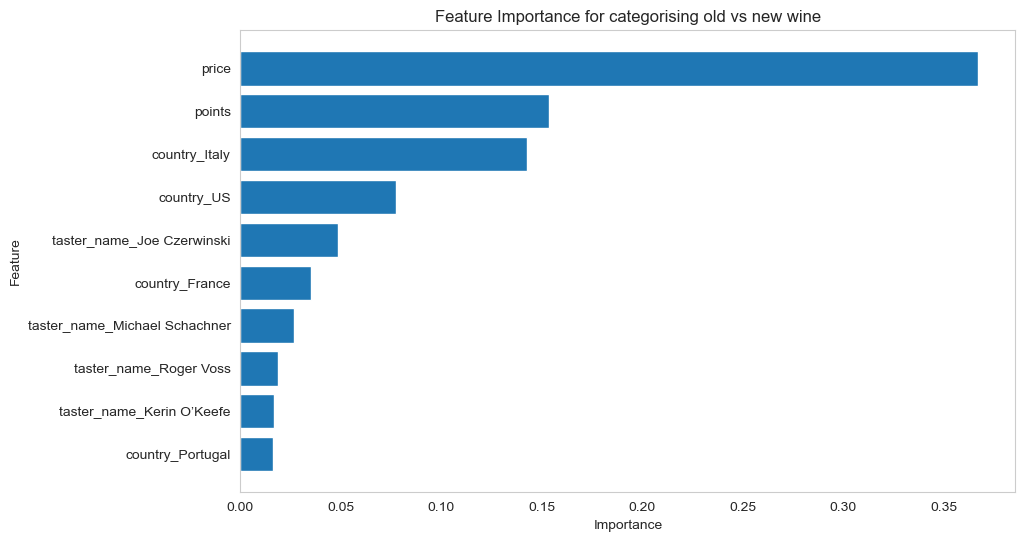

In [101]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)


top_10 = feature_importance.head(10)
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_10['Feature'], top_10['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for categorising old vs new wine')
plt.show()
